**Importings**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from scipy.stats import norm
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Reading data**

In [3]:
data=pd.read_csv('/content/drive/MyDrive/bitcoin dataset/filtered_data.csv')

**Exploring data**

In [4]:
data.head()

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,0,1577836800,7160.69,7160.69,7159.64,7159.64,5.501691,39392.484606,7160.068520
1,1,1577836860,7161.51,7161.51,7155.09,7161.20,3.776924,27047.304680,7161.198209
2,2,1577836920,7158.82,7158.82,7158.82,7158.82,0.029278,209.595359,7158.820000
3,3,1577836980,7158.82,7158.82,7156.90,7156.90,0.065819,471.156094,7158.321885
4,4,1577837040,7158.50,7158.50,7154.97,7157.20,0.971387,6950.500833,7155.235666


In [5]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1577836800,7160.69,7160.69,7159.64,7159.64,5.501691,39392.484606,7160.068520
1,1577836860,7161.51,7161.51,7155.09,7161.20,3.776924,27047.304680,7161.198209
2,1577836920,7158.82,7158.82,7158.82,7158.82,0.029278,209.595359,7158.820000
3,1577836980,7158.82,7158.82,7156.90,7156.90,0.065819,471.156094,7158.321885
4,1577837040,7158.50,7158.50,7154.97,7157.20,0.971387,6950.500833,7155.235666
...,...,...,...,...,...,...,...,...
655196,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
655197,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
655198,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
655199,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [7]:
data.isna().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

**Feature Engineering**

In [8]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655201 entries, 0 to 655200
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Timestamp          655201 non-null  datetime64[ns]
 1   Open               655201 non-null  float64       
 2   High               655201 non-null  float64       
 3   Low                655201 non-null  float64       
 4   Close              655201 non-null  float64       
 5   Volume_(BTC)       655201 non-null  float64       
 6   Volume_(Currency)  655201 non-null  float64       
 7   Weighted_Price     655201 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 40.0 MB


In [10]:
data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2020-01-01 00:00:00,7160.69,7160.69,7159.64,7159.64,5.501691,39392.484606,7160.068520
1,2020-01-01 00:01:00,7161.51,7161.51,7155.09,7161.20,3.776924,27047.304680,7161.198209
2,2020-01-01 00:02:00,7158.82,7158.82,7158.82,7158.82,0.029278,209.595359,7158.820000
3,2020-01-01 00:03:00,7158.82,7158.82,7156.90,7156.90,0.065819,471.156094,7158.321885
4,2020-01-01 00:04:00,7158.50,7158.50,7154.97,7157.20,0.971387,6950.500833,7155.235666
...,...,...,...,...,...,...,...,...
655196,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
655197,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
655198,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
655199,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [11]:
y_1=norm(loc=data['Open'].mean(),scale=data['Open'].std()).pdf(data['Open'])

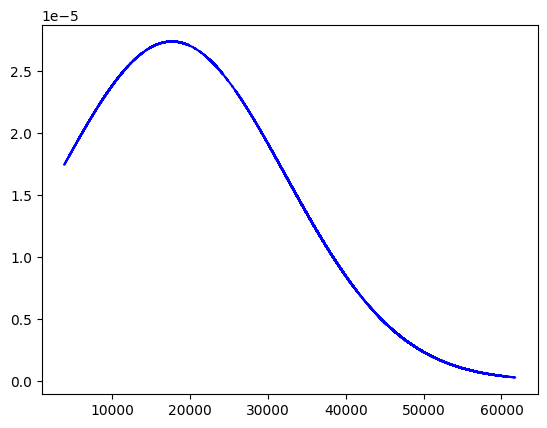

In [12]:
plt.plot(data['Open'],y_1,c='blue')
plt.show()

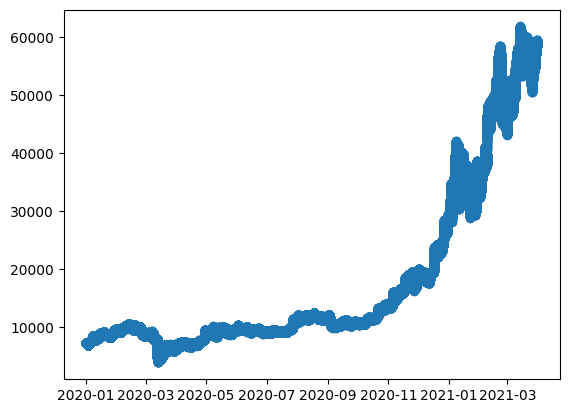

In [13]:
plt.scatter(data['Timestamp'],data['Open'])

<Axes: xlabel='Open'>

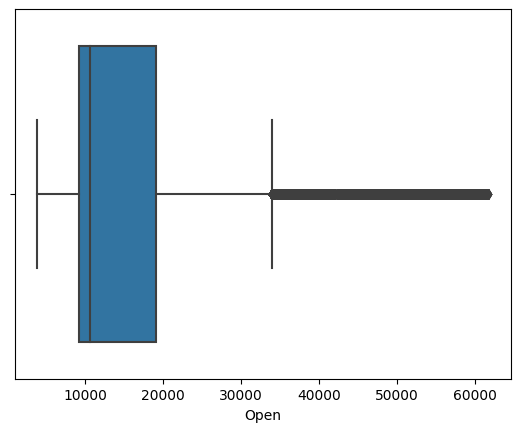

In [14]:
sns.boxplot(x=data['Open'])

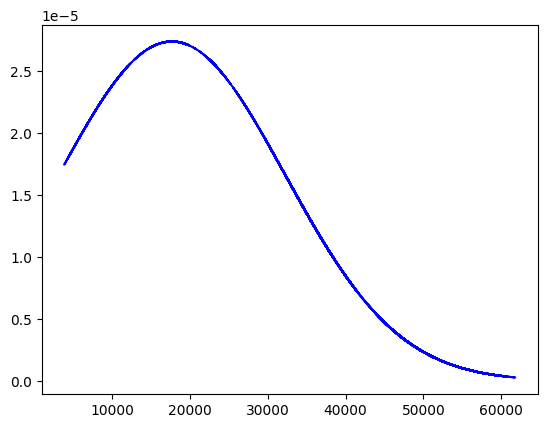

In [15]:
y_2=norm(loc=data['Close'].mean(),scale=data['Close'].std()).pdf(data['Close'])
plt.plot(data['Close'],y_2,c='blue')
plt.show()

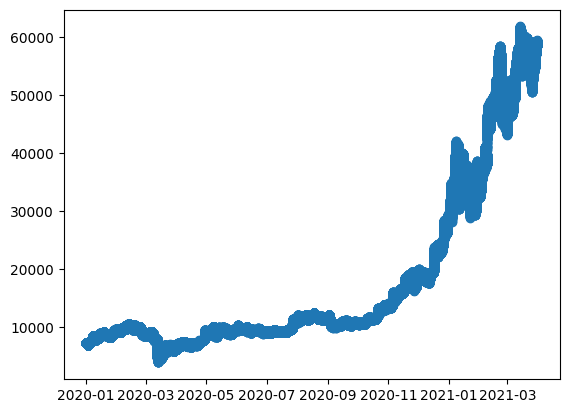

In [16]:
plt.scatter(data['Timestamp'],data['Close'])

<Axes: xlabel='Close'>

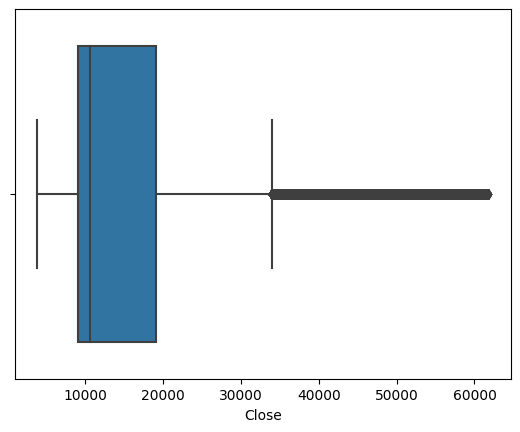

In [17]:
sns.boxplot(x=data['Close'])

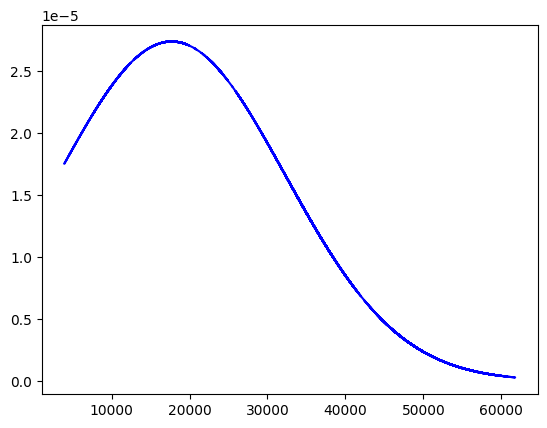

In [18]:
y_3=norm(loc=data['High'].mean(),scale=data['High'].std()).pdf(data['High'])
plt.plot(data['High'],y_3,c='blue')
plt.show()

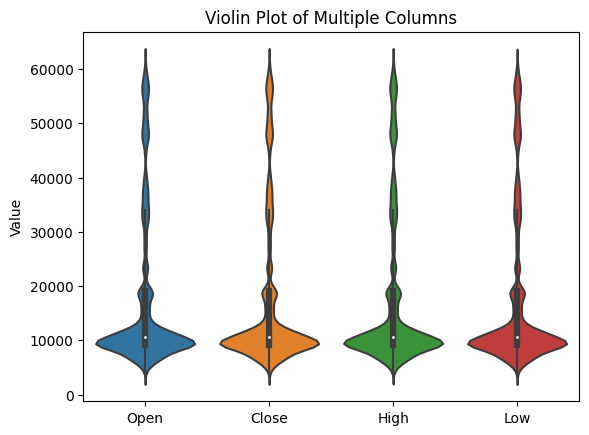

In [19]:
columns_to_plot=['Open','Close','High','Low']
sns.violinplot(data=data[columns_to_plot])
plt.ylabel('Value')
plt.title('Violin Plot of Multiple Columns')
plt.show()

**Extracting insights**

**1- Highest close price according to each year**

In [20]:
data['year'] = data['Timestamp'].dt.year


In [21]:
data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,year
0,2020-01-01 00:00:00,7160.69,7160.69,7159.64,7159.64,5.501691,39392.484606,7160.068520,2020
1,2020-01-01 00:01:00,7161.51,7161.51,7155.09,7161.20,3.776924,27047.304680,7161.198209,2020
2,2020-01-01 00:02:00,7158.82,7158.82,7158.82,7158.82,0.029278,209.595359,7158.820000,2020
3,2020-01-01 00:03:00,7158.82,7158.82,7156.90,7156.90,0.065819,471.156094,7158.321885,2020
4,2020-01-01 00:04:00,7158.50,7158.50,7154.97,7157.20,0.971387,6950.500833,7155.235666,2020
...,...,...,...,...,...,...,...,...,...
655196,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,2021
655197,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,2021
655198,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,2021
655199,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202,2021


In [22]:
highest_close_by_year = data.groupby('year')['Close'].max()


In [23]:
highest_close_by_year

year
2020    29299.94
2021    61781.80
Name: Close, dtype: float64

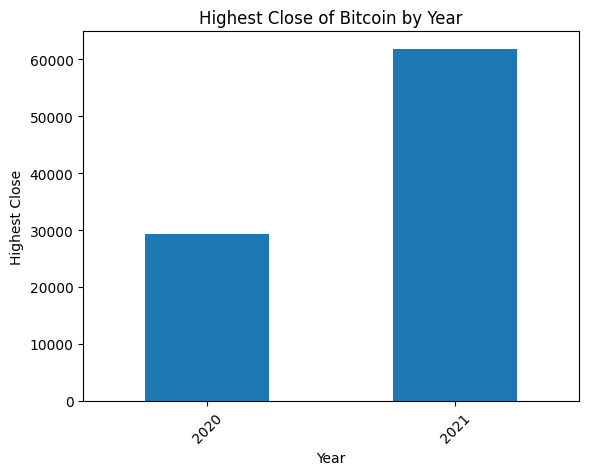

In [24]:
highest_close_by_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Highest Close')
plt.title('Highest Close of Bitcoin by Year')
plt.xticks(rotation=45)
plt.show()

**Visualization of Bitcoin close price overtime**

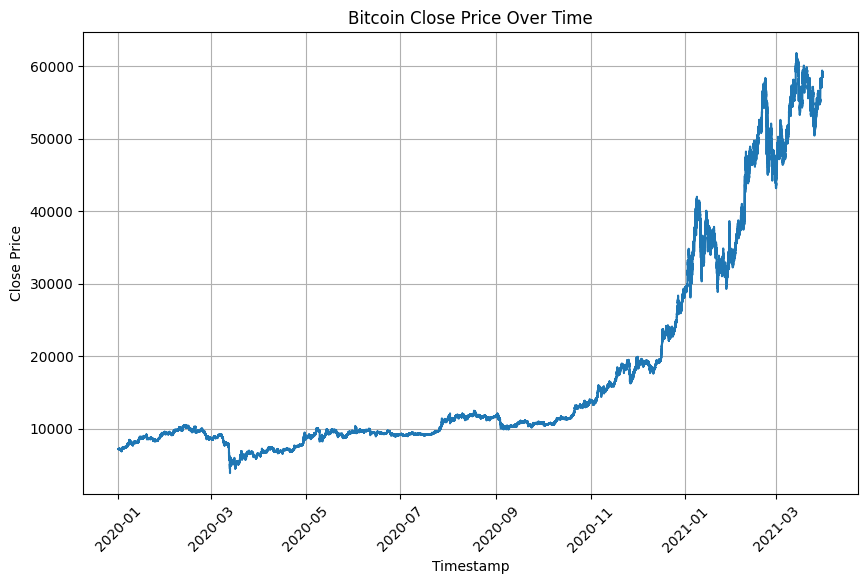

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'], data['Close'])
plt.xlabel('Timestamp')
plt.ylabel('Close Price')
plt.title('Bitcoin Close Price Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**2-Summation of Volume(Currency) according to each year from January 2020 to March 2021**

In [26]:
sum_volume_currency_per_year = data.groupby('year')['Volume_(Currency)'].sum()

In [27]:
sum_volume_currency_per_year

year
2020    3.342900e+10
2021    3.513083e+10
Name: Volume_(Currency), dtype: float64

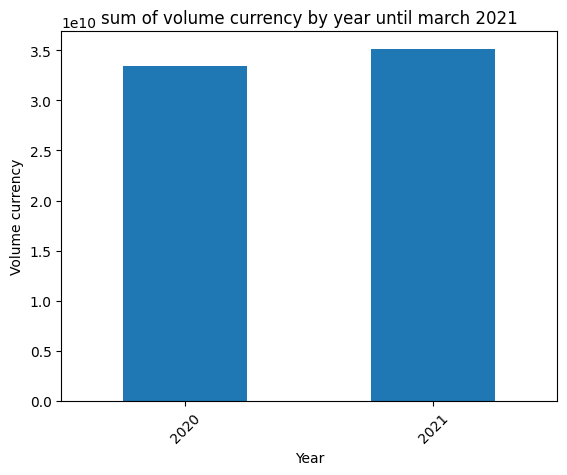

In [29]:
sum_volume_currency_per_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Volume currency')
plt.title('sum of volume currency by year until march 2021')
plt.xticks(rotation=45)
plt.show()

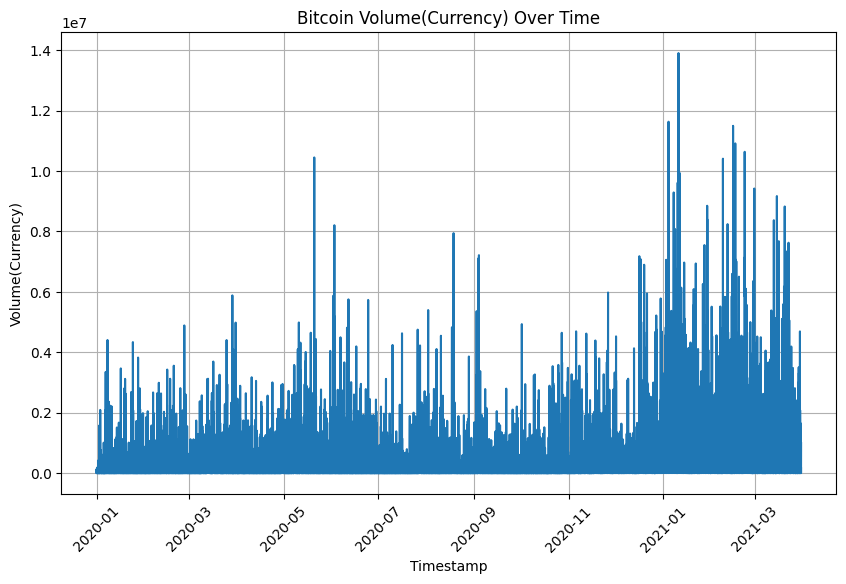

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'], data['Volume_(Currency)'])
plt.xlabel('Timestamp')
plt.ylabel('Volume(Currency)')
plt.title('Bitcoin Volume(Currency) Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**3-Summation of Volume(BTC) according to each year from January 2020 to March 2021**

In [ ]:
sum_volume_btc_per_year = data.groupby('year')['Volume_(BTC)'].sum()


In [ ]:
sum_volume_btc_per_year

year
2020    3.089712e+06
2021    8.513484e+05
Name: Volume_(BTC), dtype: float64

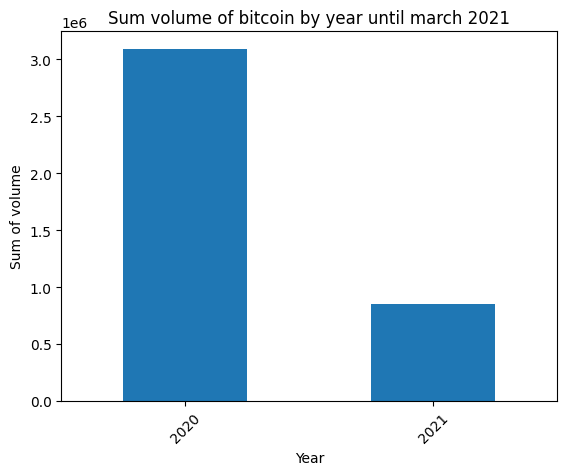

In [ ]:
sum_volume_btc_per_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Sum of volume')
plt.title('Sum volume of bitcoin by year until march 2021')
plt.xticks(rotation=45)
plt.show()

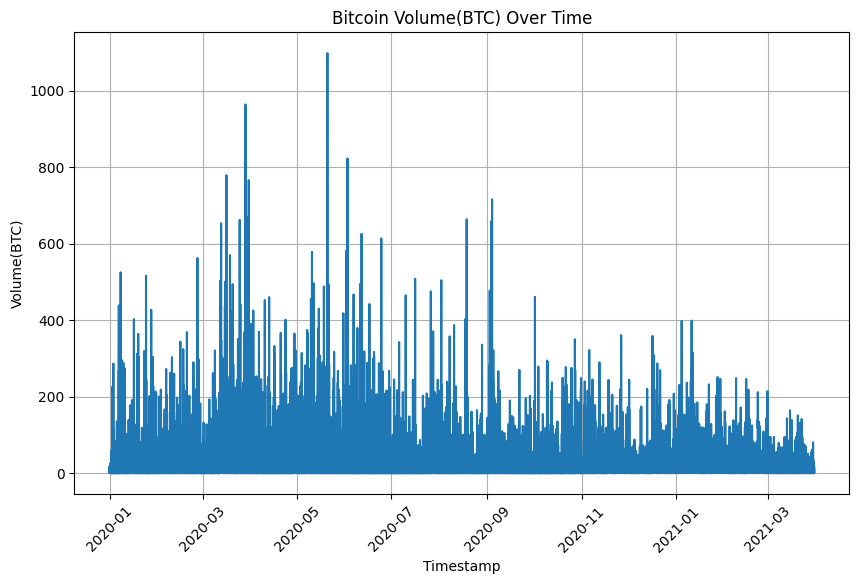

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'], data['Volume_(BTC)'])
plt.xlabel('Timestamp')
plt.ylabel('Volume(BTC)')
plt.title('Bitcoin Volume(BTC) Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**4-Time of highest close price in 2020,2021 and all time**

In [ ]:
df_2020 = data[data['Timestamp'].dt.year == 2020]


In [ ]:
max_close_row = df_2020[df_2020['Close'] == df_2020['Close'].max()]
max_close_datetime = max_close_row['Timestamp'].values[0]
print("Datetime of Maximum Close Price in 2020:", max_close_datetime)

Datetime of Maximum Close Price in 2020: 2020-12-31T00:20:00.000000000


In [ ]:
df_2021 = data[data['Timestamp'].dt.year == 2021]
max_close_row_2021 = df_2021[df_2021['Close'] == df_2021['Close'].max()]
max_close_datetime_2021 = max_close_row_2021['Timestamp'].values[0]
print("Datetime of Maximum Close Price in 2021:", max_close_datetime_2021)

Datetime of Maximum Close Price in 2021: 2021-03-13T20:41:00.000000000


In [ ]:
max_close_row_all_time = data[data['Close'] == data['Close'].max()]
max_close_datetime_all_time = max_close_row_all_time['Timestamp'].values[0]
print("Datetime of Maximum Close Price all time:", max_close_datetime_all_time)

Datetime of Maximum Close Price all time: 2021-03-13T20:41:00.000000000


**5-Time of highest Volume(Currency)**

In [ ]:
max_volume_row_all_time = data[data['Volume_(Currency)'] == data['Volume_(Currency)'].max()]
max_volume_datetime_all_time = max_volume_row_all_time['Timestamp'].values[0]
print("Datetime of Maximum Volume(Currency) all time:", max_volume_datetime_all_time)

Datetime of Maximum Volume(Currency) all time: 2021-01-10T20:28:00.000000000


**6-Time of highest Volume(BTC)**

In [ ]:
max_volume_btc_row_all_time = data[data['Volume_(BTC)'] == data['Volume_(BTC)'].max()]
max_volume_btc_datetime_all_time = max_volume_btc_row_all_time['Timestamp'].values[0]
print("Datetime of Maximum Volume(BTC) all time:", max_volume_btc_datetime_all_time)

Datetime of Maximum Volume(BTC) all time: 2020-05-20T15:15:00.000000000
